# Charging Infrastructures for EVs and Fuel prices in France


## Introduction

### Is the fuel price in France affecting the number of charging stations for electric vehicles?

Electric vehicles (EVs) are becoming more and more popular in the world thereby resulting in an increase in demand for charging stations. We already know that fuel prices are one of the driving factors for the adaptation of electric vehicles but is it also affecting the number of charging stations ? In this notebook, we will try to dig deeper into this question by analyzing the fuel prices and the number of charging stations in France.

## Data Sources


### Data description : Why, Where and What of the data

The choice of data is not only driven by the main question but also by the availability of the datasets, credibility of the data source and the quality of the data itself. This data is generated by the French government and is avaiable to all for free on transport.data.gouv.fr 

### Datasource1: Charging Stations for Electric Vehicles in France
* Metadata URL: https://transport.data.gouv.fr/datasets/fichier-consolide-des-bornes-de-recharge-pour-vehicules-electriques
* Data URL: https://www.data.gouv.fr/fr/datasets/r/2729b192-40ab-4454-904d-735084dca3a3
* Data Format : Structured Data - CSV
* Data Quality: Accuracy - High, Completeness - Low, Consistency - High, Timeliness - Medium, Relevance - Medium

The dataset contains information about the charging stations for electric vehicles in France. It includes the location of the charging stations, the type of charging stations, the number of charging stations, and the number of charging points.

### Datasource2: Fuel Prices in France

* Metadata URL: https://transport.data.gouv.fr/datasets/prix-des-carburants-en-france-flux-quotidien-1
* Data URL: https://data.economie.gouv.fr/api/explore/v2.1/catalog/datasets/prix-carburants-quotidien/exports/csv
* Data Format : Structured Data - CSV
* Data Quality: Accuracy - High, Completeness - Medium, Consistency - High, Timeliness - High, Relevance - High

The dataset contains information about the fuel prices in France. It includes the location of the fuel stations, the type of fuel stations, the fuel prices, and the date of the fuel prices.


### License of the data
You can find the open license information of two datasets on https://www.data.gouv.fr/fr/datasets/fichier-consolide-des-bornes-de-recharge-pour-vehicules-electriques/ and https://www.data.gouv.fr/fr/datasets/prix-des-carburants-en-france-flux-quotidien-1/ respectively. I would like to use the data for analysis and visualization purposes only purely for educational purposes and not for commercial purposes. As per this license, I am allowed to use the data to transform, modify, and build upon the data for analysis and visualization purposes and share the data while still giving credits to original source. Hence, whatever the data pipelines, transformations and visualizations I will be doing should be open as well.




## Data Pipeline

The entire pipeline is written in Python and is divided into below steps :

* Data Collection - Downloading the data from the source using requests and os libraries
* Data Profiling - manual profiling of the data to understand the data better
* Data Cleaning - Processing the data and converting it into a structured format using pandas library
* Data Storage - Stroring the data in .sqlite files using sqlite3 library
* Data Imputation - This step is skipped for now

### Data Profiling - manual work

* Understanding the data - checking the columns and the data types
* Reducing the data - removing the columns which are not required

### Data Cleaning / Transformation

* Correct errors - removing special characters, translating the columns to English
* Standardize data - converting the columns to standard formats
* Fill in missing values - filling the missing values

### Problems Encountered

* Trying to understand the data in French by using online translators
* Removing a lot of unwanted columns from the tables
* Plotting the data in a meaningful way

### Error Handling

The pipeline filters out all the unwanted stuff thereby making the data more readable and understandable. It should be noted that with changing requirements of date ranges, the pipeline needs to be updated accordingly. The errors will be corrected and the missing values will be filled but changing input date ranges will require manual intervention to fix the overlapping between two datasets.

## Displaying the pipeline

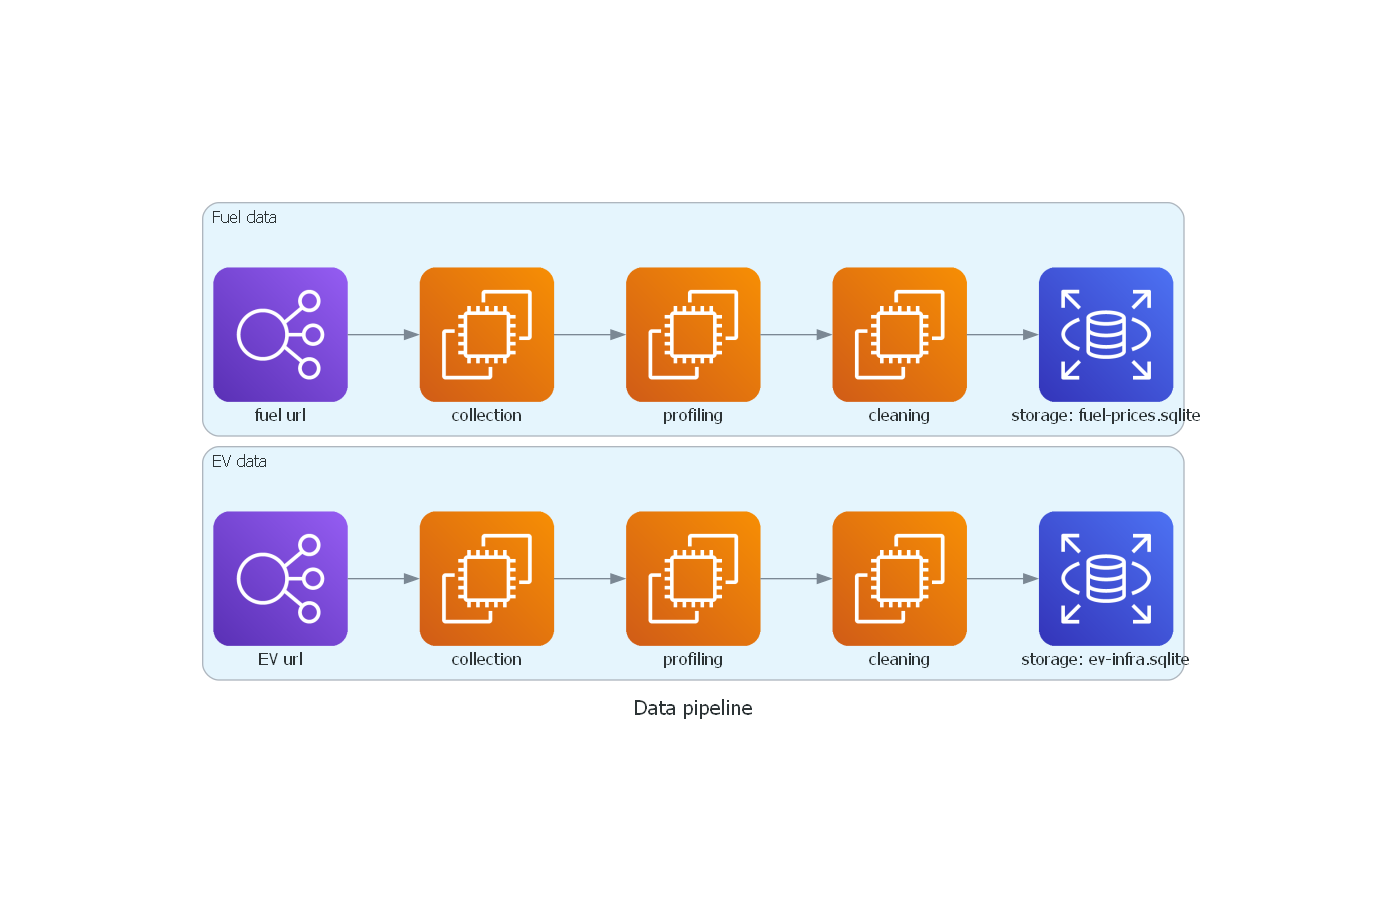

In [5]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from IPython.display import display, Image


with Diagram("Data pipeline", show=False) as diag:
    with Cluster("EV data"):
        ELB("EV url") >> EC2("collection")  >> EC2("profiling") >> EC2("cleaning") >> RDS("storage: ev-infra.sqlite")

    with Cluster("Fuel data"):
         ELB("fuel url") >> EC2("collection")  >> EC2("profiling") >> EC2("cleaning") >> RDS("storage: fuel-prices.sqlite")
    
display(Image(diag.filename + ".png"))

## Results and Limitations

The result of this pipeline is a structured data of charging stations for electric vehicles and fuel prices in France which is stored in .sqlite files and ready to be used for further analysis process obtained by data profiling, cleaning and transformation.
* Data Format : Structured Data - sqlite
* Data Quality: Accuracy - High, Completeness - Medium, Consistency - High, Timeliness - High, Relevance - High

The choice of sqlite is made because it is a lightweight database and it is easy to use / share the data with others. The data is stored in a structured format which can be easily queried and analysed using SQL queries. The data is also stored in a simple files which are easy to work with.

The limitations of the data could be that the data may be incomplete to some extent and difficult to make generalizations about the entire country based on the data. Although at first glance, the data may not have much overlap because of data ranges, but it is possible to combine the data and analyze it in a meaningful way.

Another limitation is that the usage of two different files to store the data may lead to some confusion and may require more effort to combine the data and analyze it. This can be handled by unifyig the data into a single file and then analyzing it based on the date ranges.

